In [2]:
import tensorflow as tf
print(tf.__version__)

2.8.2


# The Sequential model API

 ## Coding tutorials
 #### [1. Building a Sequential model](#coding_tutorial_1)
 #### [2. Convolutional and pooling layers](#coding_tutorial_2)
 #### [3. The compile method](#coding_tutorial_3)
 #### [4. The fit method](#coding_tutorial_4)
 #### [5. The evaluate and predict methods](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Building a Sequential model

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax

#### Build a feedforward neural network model

In [5]:
# Build the Sequential feedforward neural network model
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(16, activation='relu', name='layer_1'),
    Dense(16, activation='relu'),
    Dense(10, activation='softmax'),
])

# this is the same as the one on top
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(16, activation='relu', name='layer_1'),
    Dense(16, activation='relu'),
    Dense(10),
    Softmax()
])


In [6]:
# Print the model summary
model.weights
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 layer_1 (Dense)             (None, 16)                12560     
                                                                 
 dense_2 (Dense)             (None, 16)                272       
                                                                 
 dense_3 (Dense)             (None, 10)                170       
                                                                 
 softmax (Softmax)           (None, 10)                0         
                                                                 
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_2"></a>
## Convolutional and pooling layers

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

#### Build a convolutional neural network model

In [8]:
# Build the Sequential convolutional neural network model
model = Sequential([
    Conv2D(16,(3,3), activation='relu', input_shape=(32,32,3), data_format='channels_last'),      # shape 30, 30 ,16
    MaxPooling2D((3,3)),                                             # shape 10, 10, 16
    Flatten(),                                                       # shape 10 x 10 x 16 = 1600
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])


In [9]:
# Print the model summary
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 10, 10, 16)       0         
 )                                                               
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dense_4 (Dense)             (None, 64)                102464    
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 103,562
Trainable params: 103,562
Non-trainable params: 0
________________________________________________

### This is the model we will use for our example

In [10]:
# Build the Sequential convolutional neural network model
model = Sequential([
    Conv2D(16,(3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((3,3)),                                             
    Flatten(),
    Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 16)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 1024)              0         
                                                                 
 dense_6 (Dense)             (None, 10)                10250     
                                                                 
Total params: 10,410
Trainable params: 10,410
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_3"></a>
## The compile method

#### Compile the model

In [11]:
# Define the model optimizer, loss function and metrics
# Define the model optimizer, loss function and metrics
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy', 'mae']
)

# these are the settings for our example
opt = tf.keras.optimizers.Adam(learning_rate=0.005)
acc = tf.keras.metrics.SparseCategoricalAccuracy()
mae = tf.keras.metrics.MeanAbsoluteError()

model.compile(optimizer=opt,
             loss='sparse_categorical_crossentropy',
             metrics=[acc, mae])


In [13]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 16)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 1024)              0         
                                                                 
 dense_6 (Dense)             (None, 10)                10250     
                                                                 
Total params: 10,410
Trainable params: 10,410
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Print the resulting model attributes
print(model.optimizer)
print(model.loss)
print(model.metrics)

print(model.optimizer.lr)


sparse_categorical_crossentropy
[]
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.005>


***
<a id="coding_tutorial_4"></a>
## The fit method

In [15]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Load the data

In [16]:
# Load the Fashion-MNIST dataset

fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [17]:
# Print the shape of the training data
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)
print()
print(train_images[..., np.newaxis].shape)


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)

(60000, 28, 28, 1)


In [18]:
# Define the labels

labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

In [19]:
# Rescale the image values so that they lie in between 0 and 1.
train_images = train_images / 255.
test_images = test_images / 255.


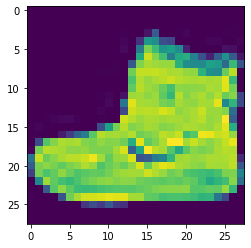

Label: Ankle boot


In [20]:
# Display one of the images
i = 0
img = train_images[i,:,:]
plt.imshow(img)
plt.show()
print(f'Label: {labels[train_labels[i]]}')


#### Fit the model

In [21]:
# Fit the model
hist_8epochs = model.fit(train_images[..., np.newaxis], train_labels, epochs=8, batch_size=256)


Epoch 1/8
235/235 [==============================] - 13s 5ms/step - loss: 0.5562 - sparse_categorical_accuracy: 0.8054 - mean_absolute_error: 4.4200
Epoch 2/8
235/235 [==============================] - 2s 7ms/step - loss: 0.3762 - sparse_categorical_accuracy: 0.8652 - mean_absolute_error: 4.4200
Epoch 3/8
235/235 [==============================] - 2s 7ms/step - loss: 0.3441 - sparse_categorical_accuracy: 0.8762 - mean_absolute_error: 4.4200
Epoch 4/8
235/235 [==============================] - 2s 6ms/step - loss: 0.3216 - sparse_categorical_accuracy: 0.8851 - mean_absolute_error: 4.4200
Epoch 5/8
235/235 [==============================] - 1s 4ms/step - loss: 0.3044 - sparse_categorical_accuracy: 0.8904 - mean_absolute_error: 4.4200
Epoch 6/8
235/235 [==============================] - 1s 4ms/step - loss: 0.2954 - sparse_categorical_accuracy: 0.8928 - mean_absolute_error: 4.4200
Epoch 7/8
235/235 [==============================] - 1s 5ms/step - loss: 0.2888 - sparse_categorical_accuracy: 

#### Plot training history

In [22]:
# Load the history into a pandas Dataframe
history = hist_8epochs

df = pd.DataFrame(history.history)
df.head()


,loss,sparse_categorical_accuracy,mean_absolute_error
0,0.556208,0.805350,4.420001
1,0.376194,0.865200,4.419999
2,0.344126,0.876183,4.420002
3,0.321579,0.885133,4.420000
4,0.304389,0.890417,4.420000


[Text(0.5, 0, 'Epochs')]

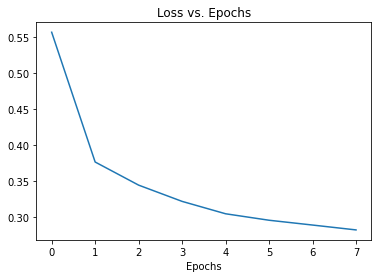

In [23]:
# Make a plot for the loss
loss_plot = df.plot(y='loss', title='Loss vs. Epochs', legend=False)
loss_plot.set(xlabel='Epochs')


[Text(0.5, 0, 'Epochs')]

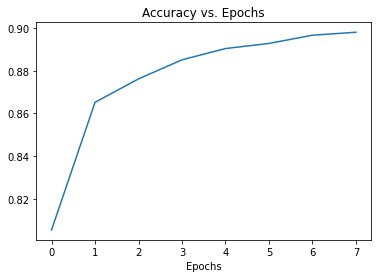

In [24]:
# Make a plot for the accuracy
loss_plot = df.plot(y='sparse_categorical_accuracy', title='Accuracy vs. Epochs', legend=False)
loss_plot.set(xlabel='Epochs')


[Text(0.5, 0, 'Epochs')]

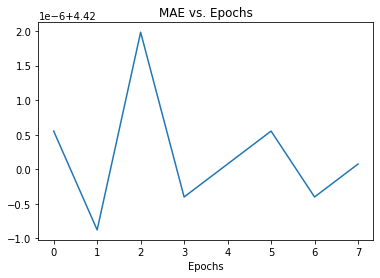

In [25]:
# Make a plot for the additional metric
loss_plot = df.plot(y='mean_absolute_error', title='MAE vs. Epochs', legend=False)
loss_plot.set(xlabel='Epochs')


***
<a id="coding_tutorial_5"></a>
## The evaluate and predict methods

In [26]:
import matplotlib.pyplot as plt
import numpy as np

#### Evaluate the model on the test set

In [27]:
# Evaluate the model
test_loss, test_accuracy, test_mae = model.evaluate(test_images[..., np.newaxis], test_labels)


313/313 [==============================] - 1s 3ms/step - loss: 0.3068 - sparse_categorical_accuracy: 0.8872 - mean_absolute_error: 4.4200


#### Make predictions from the model

In [ ]:
# Choose a random test image

# random_inx = np.random.choice(test_images.shape[0])

# test_image = test_images[random_inx]
# plt.imshow(test_image)
# plt.show()
# print(f"Label: {labels[test_labels[random_inx]]}")

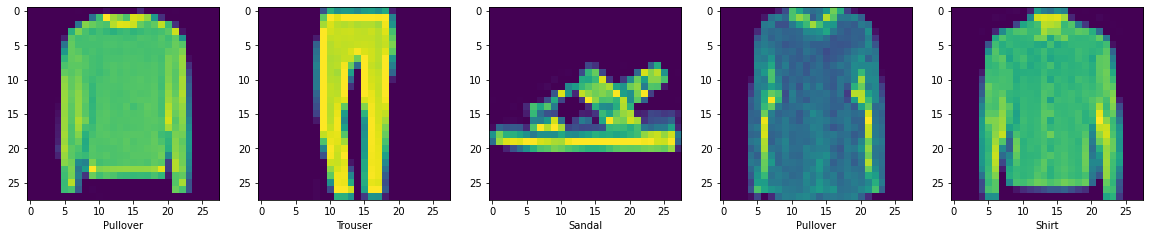

In [28]:
# Choose a random test image
number_of_tests = 5
idxs = np.random.choice(test_images.shape[0], number_of_tests)

fig, axes = plt.subplots(1,5, figsize=(20, 10))

for i, idx in enumerate(idxs):
    test_image = test_images[idx]
    axes[i].imshow(test_image)
    true_label = labels[test_labels[idx]]
    axes[i].set_xlabel(true_label)

#     print(f"Label: {labels[test_labels[idx]]}")

In [29]:
# Get the model predictions
print(test_images.shape)
print(test_images[idxs,:,:].shape)
print((test_images[idxs,:,:])[..., np.newaxis].shape) # add last axis for channels
predictions = model.predict((test_images[idxs,:,:])[..., np.newaxis])


(10000, 28, 28)
(5, 28, 28)
(5, 28, 28, 1)


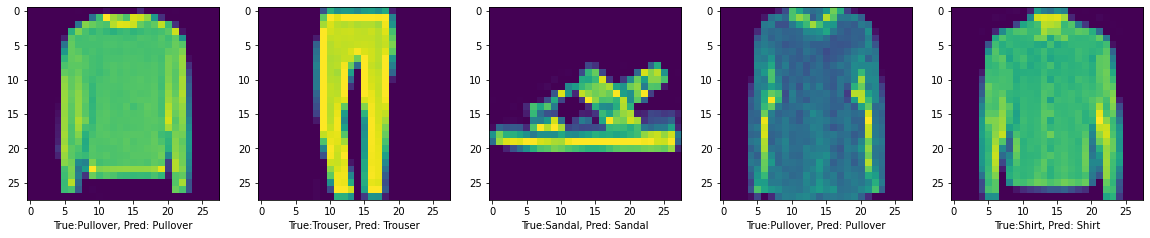

In [30]:
fig, axes = plt.subplots(1,5, figsize=(20, 10))

for i, idx in enumerate(idxs):
    test_image = test_images[idx]
    axes[i].imshow(test_image)
    true_label = labels[test_labels[idx]]
    pred_label = labels[predictions[i, :].argmax()]
    axes[i].set_xlabel('True:' + true_label + ', Pred: ' + pred_label)

In [31]:
for pred in predictions:
    max_idx = pred.argmax()
    print(f'Prediction: {labels[max_idx]} \t probability: {pred[max_idx]}')

Prediction: Pullover 	 probability: 0.9636569619178772
Prediction: Trouser 	 probability: 0.9999992847442627
Prediction: Sandal 	 probability: 0.9999456405639648
Prediction: Pullover 	 probability: 0.6017187833786011
Prediction: Shirt 	 probability: 0.9039635062217712


In [32]:
for pred in predictions:
    copy = np.copy(pred)
    copy.sort()
    idx_2 = pred.argsort()[-2]
    print(f'Second best: {labels[idx_2]}, \t  probability: {copy[-2]}')

Second best: Coat, 	  probability: 0.02330203540623188
Second best: Dress, 	  probability: 3.0126437877697754e-07
Second best: Sneaker, 	  probability: 3.5166292946087196e-05
Second best: Shirt, 	  probability: 0.36506009101867676
Second best: Coat, 	  probability: 0.07252717763185501
